In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import io

In [2]:
csvs = os.listdir('res')
buff = io.StringIO()
for n, c in enumerate(csvs):
    with open(f'res/{c}') as f:
        if buff.tell():
            try:
                f.readline()
            except:
                continue
        buff.write(f.read())
buff.seek(0)
df = pd.read_csv(buff)

In [3]:
df.columns

Index(['Seed', 'Total Number of Trials', 'Training Batch Size',
       'KL Batch Size', 'x Sequence Length', 'x Vector Length', 'p', 'beta',
       'x Standard Deviation', 'W Standard Deviation', 'Learning Rate',
       'Estimator', 'Optimizer', 'Number of Monte Carlo Samples', 'Trial',
       'SSE Log p', 'SSE Log beta', 'SSE W', 'Time Since Start',
       'zhat Estimate', 'Log ESS', 'KL Batch Estimate'],
      dtype='object')

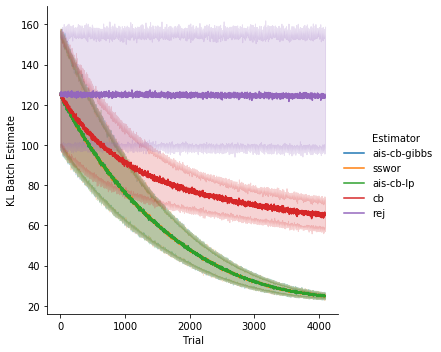

In [5]:
df_ = df[(df['beta'] == 0.0) & (df['Number of Monte Carlo Samples'] == 1)]
sns.lineplot(x='Trial', y='KL Batch Estimate', hue='Estimator', data=df_)

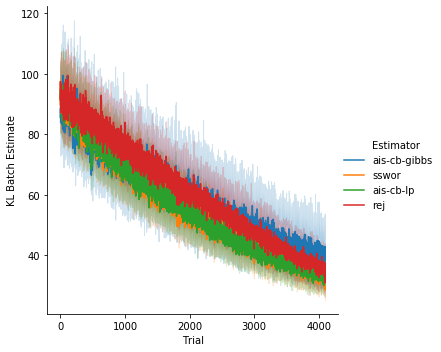

In [6]:
df_ = df[(df['beta'] == 0.25) & (df['Number of Monte Carlo Samples'] == 256)]
sns.lineplot(x='Trial', y='KL Batch Estimate', hue='Estimator', data=df_)

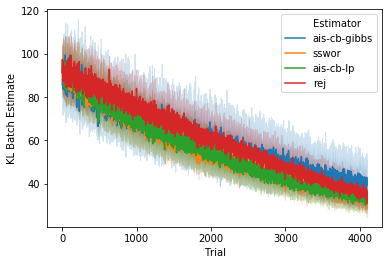

In [24]:
df_ = df[(df['beta'] == 0.75) & (df['Number of Monte Carlo Samples'] == 256)]
sns.lineplot(x='Trial', y='KL Batch Estimate', hue='Estimator', data=df_)

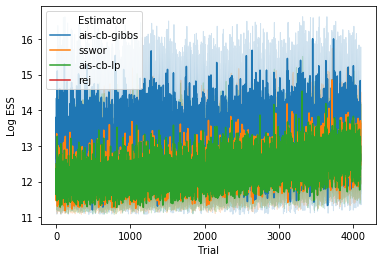

In [20]:
df_ = df[(df['beta'] == 0.75) & (df['Number of Monte Carlo Samples'] == 256)]
sns.lineplot(x='Trial', y='Log ESS', hue='Estimator', data=df_)

In [23]:
df.groupby(['Number of Monte Carlo Samples', 'Estimator'])['Log ESS'].describe()

count       mean       std  \
Number of Monte Carlo Samples Estimator                                     
1                             ais-cb-gibbs  122880.0   0.000000  0.000000   
                              ais-cb-lp     122880.0   0.000000  0.000000   
                              cb                 0.0        NaN       NaN   
                              rej                0.0        NaN       NaN   
                              sswor         122880.0   0.000000  0.000000   
256                           ais-cb-gibbs   61440.0  12.302854  1.439208   
                              ais-cb-lp     122880.0  11.858927  0.927964   
                              rej                0.0        NaN       NaN   
                              sswor         122880.0  11.871122  0.936375   
65536                         rej                0.0        NaN       NaN   
                              sswor          90112.0  23.995325  2.243906   

                                                  min        25%        50%  \
Number of Monte Carlo Samples Estimator                                       
1                             ais-cb-gibbs   0.000000   0.000000   0.000000   
                              ais-cb-lp      0.000000   0.000000   0.000000   
                              cb                  NaN        NaN        NaN   
                              rej                 NaN        NaN        NaN   
                              sswor          0.000000   0.000000   0.000000   
256                           ais-cb-gibbs  11.090355  11.277041  11.817491   
                              ais-cb-lp     11.090355  11.182813  11.622069   
                              rej                 NaN        NaN        NaN   
                              sswor         11.090355  11.187978  11.639087   
65536                         rej                 NaN        NaN        NaN   
                              sswor         22.180710  22.603205  23.282989   

                                                  75%        max  
Number of Monte Carlo Samples Estimator                           
1                             ais-cb-gibbs   0.000000   0.000000  
                              ais-cb-lp      0.000000   0.000000  
                              cb                  NaN        NaN  
                              rej                 NaN        NaN  
                              sswor          0.000000   0.000000  
256                           ais-cb-gibbs  12.598081  16.635532  
                              ais-cb-lp     12.168528  16.635532  
                              rej                 NaN        NaN  
                              sswor         12.183791  16.635532  
65536                         rej                 NaN        NaN  
                              sswor         24.257585  33.271065